# <span style="color:#0F19C9">Contenido</span>

- [Importar librerías y datos](#importar-librerías-y-datos)
- [Dataframe contract](#dataframe-contract)
- [Dataframe personal](#dataframe-personal)
- [Dataframe internet](#dataframe-internet)
- [Dataframe phone](#dataframe-phone)

# <span style="color:#0F19C9">Importar librerías y datos</span>

Comenzaremos por importar librerías de manipulación de dataframes, para la realización de pruebas estadísticas y matplotlib para la visualización de datos.

In [2]:
# Librerías de manejo de dataframes
import pandas as pd
import numpy as np
from scipy import stats

# Librerías de visualización
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [3]:
# Importar paletas de colores personalizada
juan_colors = ['#101B4B', '#545E85', '#A3A8B2',
               '#E7E7E7', '#0F19C9', '#F6D673']
colors = [juan_colors[5], juan_colors[0]]
juan_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Configurar la fuente de los gráficos
plt.rc('font', family='Georgia', size=12)

In [21]:
# Importar archivos csv
contract = pd.read_csv('../Data/contract.csv')
internet = pd.read_csv('../Data/internet.csv')
personal = pd.read_csv('../Data/personal.csv')
phone = pd.read_csv('../Data/phone.csv')

# Organizar dataframes en un diccionario
dfs = {'contract': contract, 
       'internet': internet,
       'personal': personal,
       'phone': phone}

# <span style="color:#0F19C9">Exploración inicial</span>

Comenzamos evaluando la calidad general de cada uno de los dataframes.

In [28]:
# Mostrar la información general de los dataframes
for name, df in dfs.items():
    print(f'Dataframe {name}')
    df.info()
    print('---------\n')

Dataframe contract
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
---------

Dataframe internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non

In [29]:
# Mostrar valores nulos y duplicados
for name, df in dfs.items():
    print(f'El dataframe {name} tiene {df.duplicated().sum()} registros duplicados y {df.isna().sum().sum()} valores nulos.')

El dataframe contract tiene 0 registros duplicados y 0 valores nulos.
El dataframe internet tiene 0 registros duplicados y 0 valores nulos.
El dataframe personal tiene 0 registros duplicados y 0 valores nulos.
El dataframe phone tiene 0 registros duplicados y 0 valores nulos.


In [31]:
# Escribir el nombre exacto de las columnas
for name, df in dfs.items():
    print(f'Las columnas del dataframe {name} son {list(df.columns)}')

Las columnas del dataframe contract son ['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
Las columnas del dataframe internet son ['customerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
Las columnas del dataframe personal son ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents']
Las columnas del dataframe phone son ['customerID', 'MultipleLines']


In [34]:
# Modificar el formato del nombre de las columnas
dfs['contract'].columns = ['CustomerID', 'BeginDate', 'EndDate', 'Type', 
                           'PaperlessBilling', 'PaymentMethod', 
                           'MonthlyCharges', 'TotalCharges']
dfs['internet'].columns = ['CustomerID', 'InternetService', 'OnlineSecurity', 
                           'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                           'StreamingTV', 'StreamingMovies']
dfs['personal'].columns = ['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 
                           'Dependents']
dfs['phone'].columns = ['CustomerID', 'MultipleLines']

In [36]:
# Comprobar las modificaciones
for name, df in dfs.items():
    print(f'Las columnas del dataframe {name} son {list(df.columns)}')

Las columnas del dataframe contract son ['CustomerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
Las columnas del dataframe internet son ['CustomerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
Las columnas del dataframe personal son ['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents']
Las columnas del dataframe phone son ['CustomerID', 'MultipleLines']


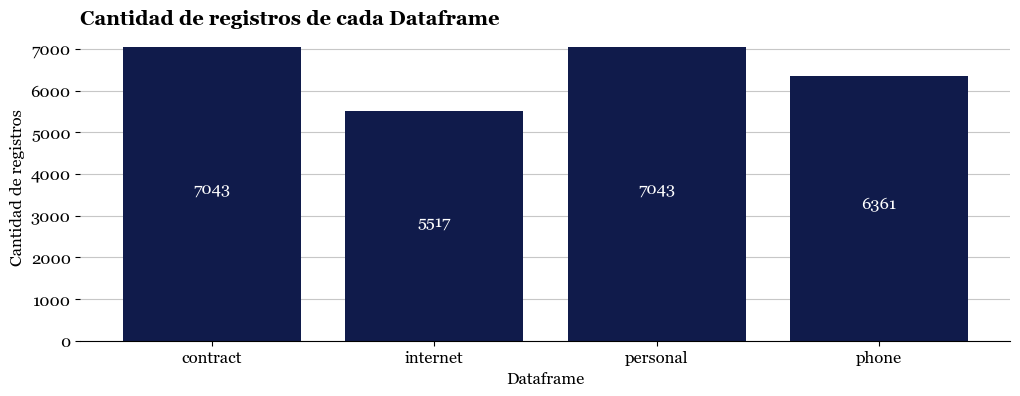

In [60]:
# Graficar la cantidad de registros de cada dataframe
fig, ax = plt.subplots(figsize=[12, 4])
plt.title('Cantidad de registros de cada Dataframe',
          weight='bold', loc='left')
bars = plt.bar(dfs.keys(),
        [df.shape[0] for df in dfs.values()],
        color=juan_colors[0],
        zorder=2)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f'{bar.get_height()}',
             ha='center',
             color='white')
plt.xlabel('Dataframe')
plt.ylabel('Cantidad de registros')
plt.grid(axis='y', zorder=1, alpha=0.7)
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

Nos encontramos con 4 archivos Comma-Separated Values (CSV) con la información correspondiente a los usuarios de la compañía Interconnect. Ninguno de los dataframes contiene registros duplicados, ni registros nulos. Cada archivo contiene los siguiente:
- El dataframe `contract` contiene la información del contrato de los servicios con una columna de `customerID` que indica un valor único para cada usuario.
- El dataframe `internet` contiene los servicios específicos que presta la compañía en internet.
    - La columna `InternetService` especifica el tipo de servicio DSL o Fibra Óptica.
    - Los otros servicios opcionales que son:
        - `OnlineSecurity`: Bloqueador de sitios web maliciosos.
        - `OnlineBackup`: Almacenamiento de archivos en la nube.
        - `DeviceProtection`: Software antivirus.
        - `TechSupport`: Línea de soporte técnico.
        - `StreamingTV`: Streaming de TV.
        - `StreamingMovies`: Streaming de películas.
- El dataframe `personal` contiene los datos personales del cliente.
- El dataframe `phone` contiene el servicio de líneas separadas de telefonía fija.

La única modificación inicial que se realizó, fue modificar el formato del nombre de las columnas para estandarizarlo, dejando todas con la primera letra mayúscula.

Los dataframes `contract` y `personal` contienen la mayor cantidad de registros (7043). El dataframe `internet` contiene 5517 y `phone` 6361.

# <span style="color:#0F19C9">Dataframe contract</span>

Exploraremos el dataframe contract, primero con un análisis univariable, es decir, de cada columna; para luego encontrar relaciones en un análisis multivariable.

## <span style="color:#0F19C9">Análisis Univariable</span>

## <span style="color:#0F19C9">Análisis Multivariable</span>

# <span style="color:#0F19C9">Dataframe personal</span>

Exploraremos el dataframe personal, primero con un análisis univariable, es decir, de cada columna; para luego encontrar relaciones en un análisis multivariable.

## <span style="color:#0F19C9">Análisis Univariable</span>

## <span style="color:#0F19C9">Análisis Multivariable</span>

# <span style="color:#0F19C9">Dataframe internet</span>

Exploraremos el dataframe internet, primero con un análisis univariable, es decir, de cada columna; para luego encontrar relaciones en un análisis multivariable.

## <span style="color:#0F19C9">Análisis Univariable</span>

## <span style="color:#0F19C9">Análisis Multivariable</span>

# <span style="color:#0F19C9">Dataframe phone</span>

Exploraremos el dataframe phone, primero con un análisis univariable, es decir, de cada columna; para luego encontrar relaciones en un análisis multivariable.

## <span style="color:#0F19C9">Análisis Univariable</span>

## <span style="color:#0F19C9">Análisis Multivariable</span>